Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
# Technically not necessary in newest versions of jupyter
%matplotlib inline

In [2]:

my_data_dir = "/home/ashish/Warepro/door_images"

In [3]:
os.listdir(my_data_dir) 

['train', 'test']

In [4]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [5]:
os.listdir(test_path)

['close', 'none', 'open']

In [6]:
os.listdir(train_path+'/open')[0]

'a703f224-8bd8-43d8-b2a3-1420def3f551.jpg'

In [7]:
open_pic = train_path+'/open/'+'a703f224-8bd8-43d8-b2a3-1420def3f551.jpg'

In [8]:
open_img = imread(open_pic)
#converting to array 

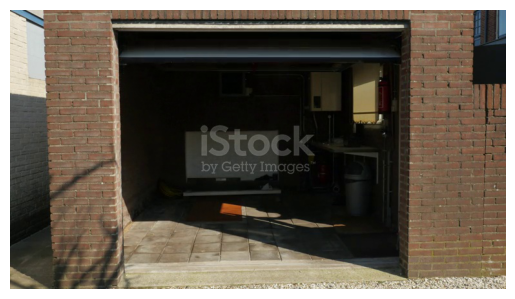

In [9]:
plt.imshow(open_img)
plt.axis('off')  # Optional: turn off the axis
plt.show()

In [10]:
open_img.shape

(432, 768, 3)

In [11]:
os.listdir(train_path+'/close')[0]

'b345aacf-7af0-438e-a9d8-c9b0135cc07b.jpg'

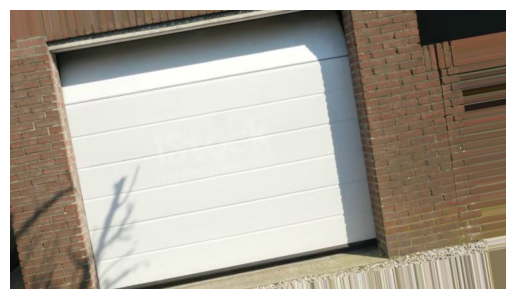

In [12]:
closed_door_path = train_path+'/close/'+os.listdir(train_path+'/close')[0]
closed_door_pic = imread(closed_door_path)
plt.imshow(closed_door_pic)
plt.axis('off')
plt.show()

In [13]:
len(os.listdir(train_path+'/open'))

300

In [14]:
# len(os.listdir(train_path+'/close'))

In [15]:
# len(os.listdir(train_path+'/none'))

In [16]:
for image_filename in os.listdir(test_path+'/open'):
    print(image_filename)

13f25826-475c-4633-b86a-779652fd953c.jpg
3cbb3a81-b3db-4cc9-b4e2-361fb67148bd.jpg
21f17f3a-4f94-4302-8272-66f83ada6cb7.jpg
9a9ff349-8c46-460e-9e58-a21532616493.jpg
8cd2ab56-b78c-4b0b-9e0a-e2253bcbf07e.jpg
4c461cac-d559-47c0-9948-1de9a0354ea8.jpg
46bf9a04-c467-4a81-9b51-4b22e655fa5e.jpg
7c94c993-3ddc-403b-ab05-e74d461b47c0.jpg
8cf240a8-bf91-4833-9723-7560c046339b.jpg
33d69641-312b-436b-befa-46c5c2bf3103.jpg
8b779681-1aed-4444-be51-152e6486a207.jpg
2ab5adaa-b3b0-426d-9ac2-8e814ac7f6ae.jpg
4be238ef-5a92-4b8e-a393-c682989ca514.jpg
36d56454-3291-4223-a243-d639c1b78342.jpg
8f962338-040f-44c2-be55-054d4d355657.jpg
2fc5c9cc-d3d0-4649-8b5e-9750a9c41e54.jpg
5a7b6a12-f1cd-4985-8daa-e0455b5ae7f5.jpg
3d7632f8-7145-40af-8569-4f0d6e2a0ab9.jpg
4e2a3d55-3d0c-4920-be94-a2d549ac4387.jpg
9abfbe03-63da-466d-be04-86243ec1bb7e.jpg
9c5edc0d-ab98-4386-b20c-8d29691f769f.jpg
16fce357-2f86-4eff-b1cf-4ad6f16337fd.jpg
3d78866a-1883-49a6-ac87-bbe9acb5cf4b.jpg
33be9fed-1db1-4ffb-953a-58dc66ae792c.jpg
2b1e4835-579b-4c

In [17]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'/open'):
    img = imread(test_path+'/open'+'/'+image_filename)
    d1,d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


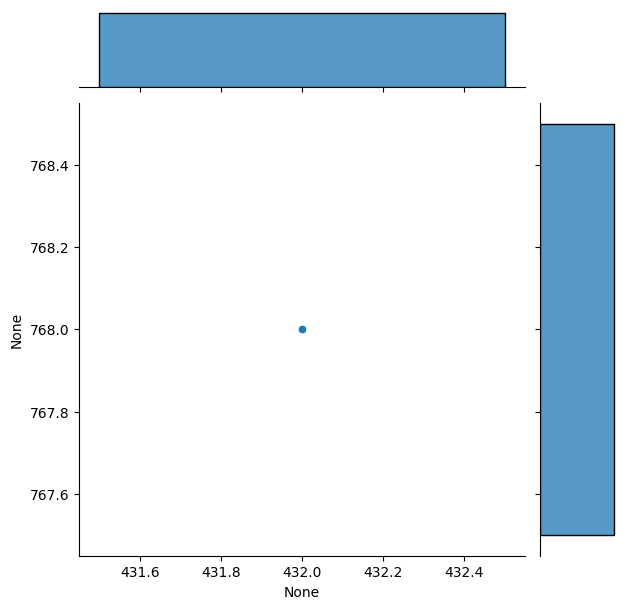

In [18]:
sns.jointplot(x=dim1, y=dim2)
plt.show()

In [19]:
image_shape = (432,768,3)

In [20]:
# check for normalisation

In [21]:
# Iterate over images and check normalization
for image_filename in os.listdir(test_path + '/open'):
    img = imread(test_path + '/open/' + image_filename)
    
    print(f"Image: {image_filename}")
    print(f"Data type: {img.dtype}")
    print(f"Min pixel value: {img.min()}")
    print(f"Max pixel value: {img.max()}")
    print("-" * 30)

Image: 13f25826-475c-4633-b86a-779652fd953c.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 3cbb3a81-b3db-4cc9-b4e2-361fb67148bd.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 21f17f3a-4f94-4302-8272-66f83ada6cb7.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 9a9ff349-8c46-460e-9e58-a21532616493.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 8cd2ab56-b78c-4b0b-9e0a-e2253bcbf07e.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 4c461cac-d559-47c0-9948-1de9a0354ea8.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 46bf9a04-c467-4a81-9b51-4b22e655fa5e.jpg
Data type: uint8
Min pixel value: 0
Max pixel value: 255
------------------------------
Image: 7c94c993-3ddc-403b-ab05-e74d461b47c0.jpg


In [22]:
#normalise to 64x64 

import cv2

train_path
categories = ['open', 'close', 'none']
resized_images = []
labels = []

# Loop through each category
for category in categories:
    folder_path = os.path.join(train_path, category)
    label = categories.index(category)  # Use 0, 1, 2 as labels for 'open', 'close', 'none'
    
    for image_filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, image_filename)
        
        # Read and resize the image
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image is read correctly
            resized_img = cv2.resize(img, (64, 64))  # Resize to 64x64
            resized_images.append(resized_img)
            labels.append(label)

# Convert to NumPy arrays
resized_images = np.array(resized_images)
labels = np.array(labels)

print("Shape of resized images:", resized_images.shape)
print("Shape of labels:", labels.shape)


Shape of resized images: (622, 64, 64, 3)
Shape of labels: (622,)


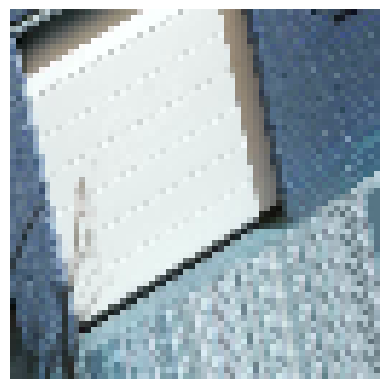

In [23]:
import matplotlib.pyplot as plt

# Select the first image in the resized_images array
image_to_show = resized_images[500]  # Change the index if you want to view other images

# Display the image
plt.imshow(image_to_show)
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

In [24]:
resized_images = resized_images / 255.0


In [25]:
#Build model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, Reshape
from tensorflow.keras.optimizers import Adam

# Build the CNN + LSTM model
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # (64, 64, 3) is the input shape
model.add(MaxPooling2D((2, 2)))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Third Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten the output from convolutional layers
model.add(Flatten())

# Reshape the output for LSTM (time_steps, features)
model.add(Reshape((1, -1)))  # (batch_size, time_steps, features)

# Add an LSTM layer
model.add(LSTM(128, activation='relu'))

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dropout layer to reduce overfitting

# Output layer (3 classes for open, close, none)
model.add(Dense(3, activation='softmax'))  # Softmax for multi-class classification

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1, 4608)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │     2,425,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,535,491 (9.67 MB)

 Trainable params: 2,535,491 (9.67 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
test_path

categories = ['open', 'close', 'none']
test_images = []
test_labels = []

# Loop through each category in the test set
for category in categories:
    folder_path = os.path.join(test_path, category)
    label = categories.index(category)  # Use 0, 1, 2 as labels for 'open', 'close', 'none'
    
    for image_filename in os.listdir(folder_path):
        img_path = os.path.join(folder_path, image_filename)
        
        # Read the image
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image is read correctly
            # Resize the image to 64x64 (same as training data)
            resized_img = cv2.resize(img, (64, 64))
            test_images.append(resized_img)
            test_labels.append(label)

# Convert to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Normalize the test images (same as training data)
test_images = test_images.astype('float32') / 255.0

print("Shape of test images:", test_images.shape)
print("Shape of test labels:", test_labels.shape)

Shape of test images: (245, 64, 64, 3)
Shape of test labels: (245,)


In [29]:
from sklearn.model_selection import train_test_split


In [30]:
# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(resized_images, labels, test_size=0.2, random_state=42)

In [31]:
# Train the model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_val, y_val),  # Validation data to check during training
    epochs=10,  
    batch_size=20  # Batch size for training 
)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 142ms/step - accuracy: 0.5406 - loss: 0.8619 - val_accuracy: 0.9440 - val_loss: 0.1572
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.8738 - loss: 0.2938 - val_accuracy: 0.9520 - val_loss: 0.0755
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9580 - loss: 0.0967 - val_accuracy: 0.9840 - val_loss: 0.0492
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9843 - loss: 0.0428 - val_accuracy: 0.9840 - val_loss: 0.0284
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9895 - loss: 0.0475 - val_accuracy: 0.9840 - val_loss: 0.0477
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 128ms/step - accuracy: 0.9927 - loss: 0.0192 - val_accuracy: 0.9840 - val_loss: 0.0369
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9942 - loss: 0.0111 - val_accuracy: 0.9840 - val_loss: 0.1003
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9926 - loss: 0.0118 - val_accuracy: 0.

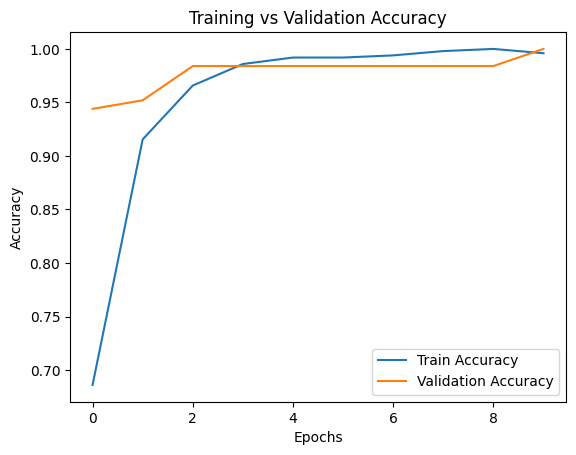

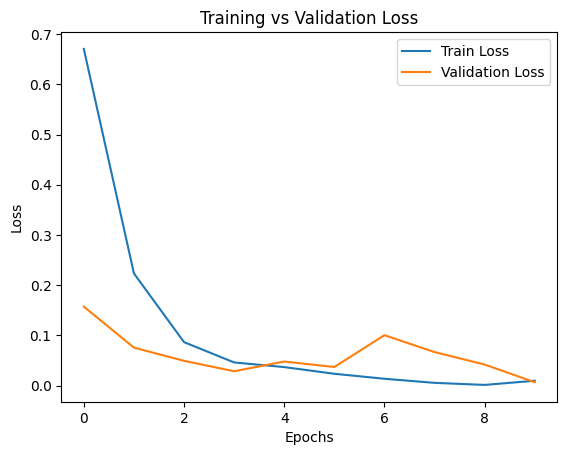

In [32]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [33]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels)  #from normalised test images and labels
print(f"Test Accuracy: {test_acc * 100:.2f}%")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 9.8676e-04
Test Accuracy: 100.00%


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


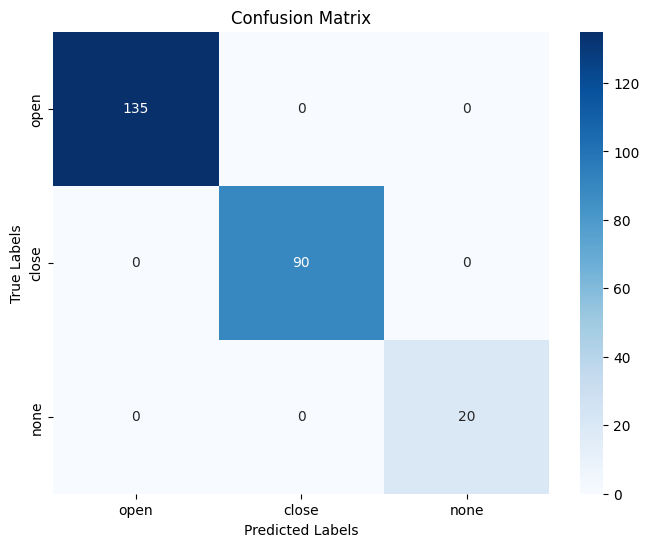

Classification Report:

              precision    recall  f1-score   support

        open       1.00      1.00      1.00       135
       close       1.00      1.00      1.00        90
        none       1.00      1.00      1.00        20

    accuracy                           1.00       245
   macro avg       1.00      1.00      1.00       245
weighted avg       1.00      1.00      1.00       245



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions for test images
test_predictions = model.predict(test_images)

# Since the model's output is one-hot encoded (softmax output), we take the class with the highest probability
test_predictions = test_predictions.argmax(axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['open', 'close', 'none'], yticklabels=['open', 'close', 'none'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:\n")
print(classification_report(test_labels, test_predictions, target_names=['open', 'close', 'none']))
